### 베이즈 추정법
- 베이즈 추정법은 모숫값이 가질 수 있는 모든 가능성의 분포를 계산하는 작업이다.
- 예를 들어
    - 상품 A : 전체 평가의견 3개, 좋아요 2개, 싫어요 1개
    - 상품 B : 전체 평가의견 100개, 좋아요 60개, 싫어요 40개
    - 상품 A의 모수 = 0.67
    - 상품 B의 모수 = 0.6
    - 상품A가 상품B보다 모수가 더 높다고 더 높은 상품이라고 확신할 수 있는가?
- 하이퍼모숫값 
    - a' = N1 + a
    - b' = N0 + b
    

In [2]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt

C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backe

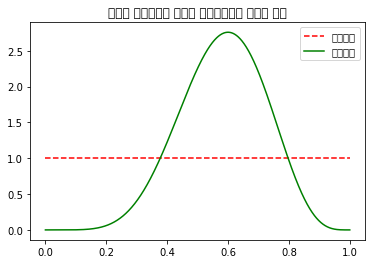

In [3]:
xx = np.linspace(0, 1, 1000)
a0, b0 = 1, 1
plt.plot(xx, sp.stats.beta(a0, b0).pdf(xx), c="r", ls="--", label="사전분포")
a1, b1 = 6 + 1, 4 + 1
plt.plot(xx, sp.stats.beta(a1, b1).pdf(xx), c="g", ls="-", label="사후분포")
plt.legend()
plt.title("베이즈 추정법으로 계산한 베르누이분포 모수의 분포")
plt.show()

- 베이즈추정법의 장점은 순차적 계싼이 가능하다는 점이다.
- 예를 들어 매 50개의 데이터를 수집하는 경우를 생각하자. 베이즈 추정법법을 사용하면 첫날 50개의 데이터로 모수를 추정한 뒤 다음날에는 추가적인 데이터 50개를 사용하여 모숫값을 더 정확하게 수정할 수 있다. 이 과정에서 계산량은 증가하지 않는다. 그다음 날도 마찬가지다.

초기 추정: 모드 = 모름
0차 추정: 모드 = 0.64
1차 추정: 모드 = 0.69
2차 추정: 모드 = 0.65


C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backe

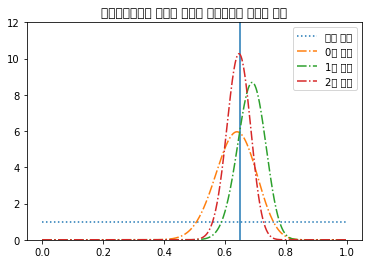

In [4]:
mu0 = 0.65
a, b = 1, 1
print("초기 추정: 모드 = 모름")

xx = np.linspace(0, 1, 1000)
plt.plot(xx, sp.stats.beta(a, b).pdf(xx), ls=":", label="초기 추정")

np.random.seed(0)

for i in range(3):
    x = sp.stats.bernoulli(mu0).rvs(50)
    N0, N1 = np.bincount(x, minlength=2)
    a, b = a + N1, b + N0
    plt.plot(xx, sp.stats.beta(a, b).pdf(xx), ls="-.", label="{}차 추정".format(i))
    print("{}차 추정: 모드 = {:4.2f}".format(i, (a - 1)/(a + b - 2)))


plt.vlines(x=0.65, ymin=0, ymax=12)
plt.ylim(0, 12)
plt.legend()
plt.title("베르누이분포의 모수를 베이즈 추정법으로 추정한 결과")
plt.show()